In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer # Added SimpleImputer
from sklearn.metrics import (confusion_matrix, classification_report,
                            roc_auc_score, roc_curve, accuracy_score,
                            precision_recall_fscore_support)
from sklearn.linear_model import LogisticRegression as SklearnLR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 2. Load dataset
# (change path if your CSV is in another folder)
df = pd.read_csv("/content/Loan_Default.csv", encoding='latin1')

# Basic structure
print("Shape of dataset:", df.shape)
print("\nColumn types:\n", df.dtypes.head())
print("\nPreview:\n", df.head())

Shape of dataset: (148670, 34)

Column types:
 ID                int64
year              int64
loan_limit       object
Gender           object
approv_in_adv    object
dtype: object

Preview:
       ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ..

In [ ]:
# 3. Basic information
print("\n--- INFO ---")
df.info()

# Descriptive statistics
print("\n--- DESCRIPTIVE STATS ---")
display(df.describe(include='all').transpose().head(15))

# Missing values
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_table = pd.DataFrame({'Missing Values': missing, '%': missing_pct})
print("\n--- MISSING VALUES ---")
display(missing_table.head(15))


--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,148670.0,NaN,NaN,NaN,99224.5,42917.476598,24890.0,62057.25,99224.5,136391.75,173559.0
year,148670.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0
loan_limit,145326,2,cf,135348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,148670,4,Male,42346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
approv_in_adv,147762,2,nopre,124621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_type,148670,3,type1,113173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_purpose,148536,4,p3,55934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_Worthiness,148670,2,l1,142344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_credit,148670,2,nopc,148114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_or_commercial,148670,2,nob/c,127908,NaN,NaN,NaN,NaN,NaN,NaN,NaN



--- MISSING VALUES ---


,Missing Values,%
Upfront_charges,39642,26.66
Interest_rate_spread,36639,24.64
rate_of_interest,36439,24.51
dtir1,24121,16.22
property_value,15098,10.16
LTV,15098,10.16
income,9150,6.15
loan_limit,3344,2.25
approv_in_adv,908,0.61
age,200,0.13



--- TARGET DISTRIBUTION ---
Status
0    75.355485
1    24.644515
Name: proportion, dtype: float64


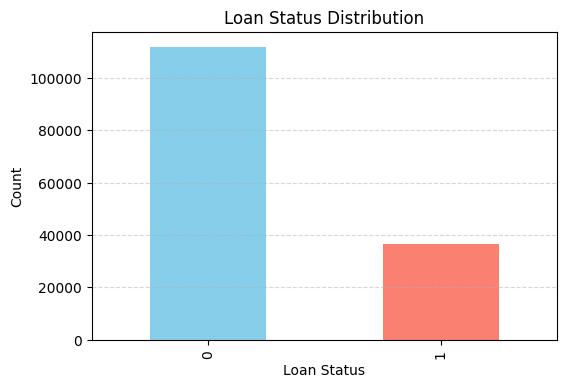


Proportion of Defaults:  0.24644514696979888


In [ ]:
# 4. Target variable analysis
target_col = 'Status' # Corrected column name

print("\n--- TARGET DISTRIBUTION ---")
print(df[target_col].value_counts(normalize=True) * 100)

plt.figure(figsize=(6,4))
df[target_col].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Simplify target (Fully Paid = 0, Default/Charged Off = 1)
# The 'Default' column is already in the desired format (0 for no default, 1 for default)
# So, no need to create a new 'default_flag' column based on 'loan_status'.
# df['default_flag'] = df[target_col].apply(lambda x: 1 if 'Charged Off' in str(x) or 'Default' in str(x) else 0)

print("\nProportion of Defaults: ", df[target_col].mean()) # Use the correct target column

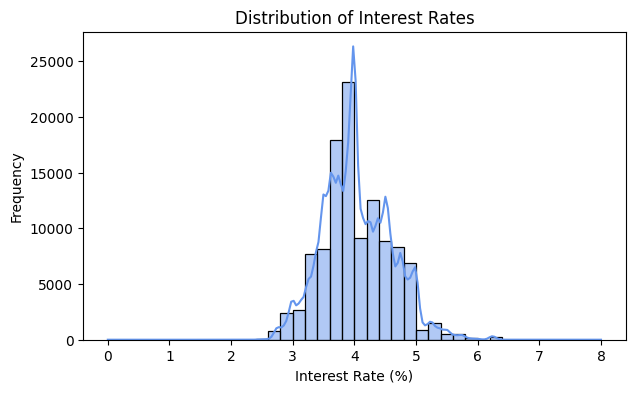

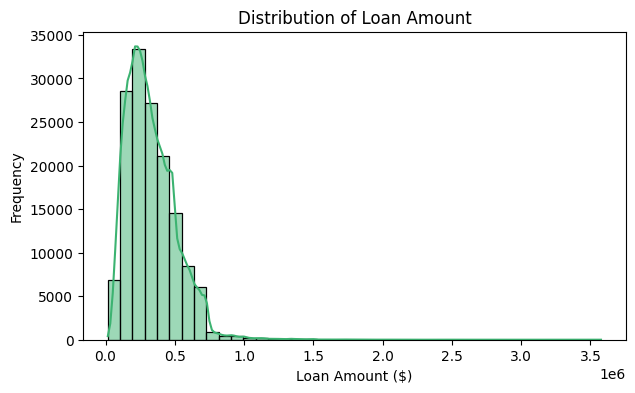

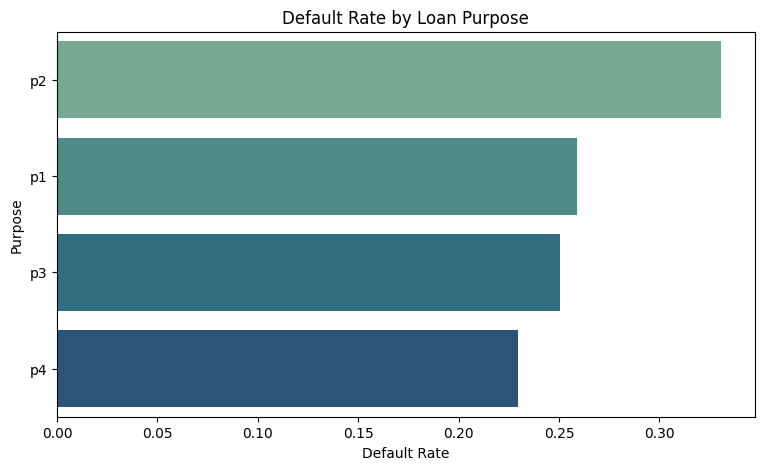

In [ ]:
# 5. Univariate analysis

# (a) Interest rate
plt.figure(figsize=(7,4))
sns.histplot(df['rate_of_interest'].dropna(), bins=40, kde=True, color='cornflowerblue')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

# (b) Loan amount
plt.figure(figsize=(7,4))
sns.histplot(df['loan_amount'].dropna(), bins=40, kde=True, color='mediumseagreen')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.show()

# (c) Education vs Default Rate
# The 'Education' column is not present in the dataset.
# if 'Education' in df.columns:
#     grade_default = df.groupby('Education')[target_col].mean().sort_index()
#     plt.figure(figsize=(6,4))
#     sns.barplot(x=grade_default.index, y=grade_default.values, palette='viridis')
#     plt.title('Default Rate by Education Level')
#     plt.xlabel('Education Level')
#     plt.ylabel('Default Rate')
#     plt.show()

# (d) Loan Purpose vs Default Rate
if 'loan_purpose' in df.columns:
    purpose_default = df.groupby('loan_purpose')[target_col].mean().sort_values(ascending=False)
    plt.figure(figsize=(9,5))
    sns.barplot(x=purpose_default.values, y=purpose_default.index, palette='crest')
    plt.title('Default Rate by Loan Purpose')
    plt.xlabel('Default Rate')
    plt.ylabel('Purpose')
    plt.show()

# (e) Loan Term vs Default
# The 'LoanTerm' column is not present in the dataset.
# if 'LoanTerm' in df.columns:
#     term_default = df.groupby('LoanTerm')[target_col].mean()
#     plt.figure(figsize=(5,4))
#     sns.barplot(x=term_default.index, y=term_default.values, palette='magma')
#     plt.title('Default Rate by Loan Term')
#     plt.ylabel('Default Rate')
#     plt.show()

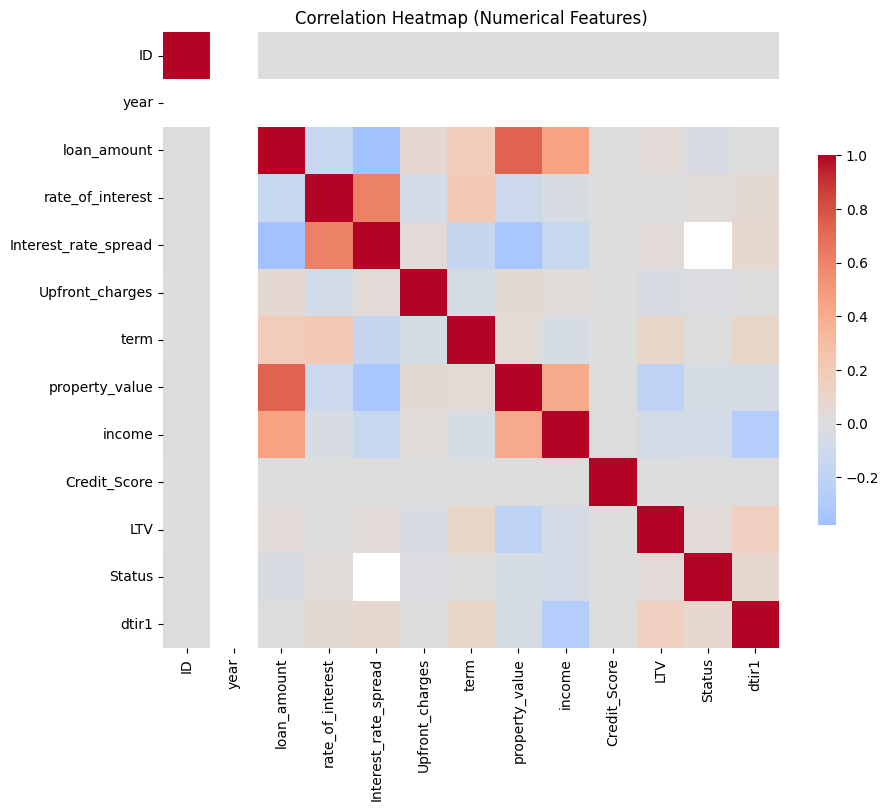

In [ ]:
# 6. Correlation analysis (numerical features only)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, cbar_kws={'shrink': .6})
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

# Top correlations with default flag
if 'default_flag' in corr.columns:
    print("\nTop 10 correlations with default_flag:\n")
    display(corr['default_flag'].abs().sort_values(ascending=False).head(10))

In [ ]:
# 7. Temporal or Geographical trends (optional if columns exist)
if 'issue_d' in df.columns:
    df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')
    yearly = df.groupby(df['issue_d'].dt.year)['default_flag'].mean()
    plt.figure(figsize=(7,4))
    yearly.plot(marker='o', color='teal')
    plt.title('Default Rate by Issue Year')
    plt.xlabel('Year')
    plt.ylabel('Default Rate')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [ ]:
# 8. Data quality summary
print("\n--- DATA QUALITY OBSERVATIONS ---")
print(f"Total missing columns > 20%: {(missing_pct > 20).sum()}")
print("Highly missing columns:", list(missing_pct[missing_pct > 20].index[:10]))

# Outlier check for annual income
if 'annual_inc' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=np.log1p(df['annual_inc']))
    plt.title('Log Annual Income Distribution')
    plt.xlabel('log(annual_inc + 1)')
    plt.show()


--- DATA QUALITY OBSERVATIONS ---
Total missing columns > 20%: 3
Highly missing columns: ['Upfront_charges', 'Interest_rate_spread', 'rate_of_interest']


In [ ]:
# 9. Summary Insights (printout for report)
print("\n--- INSIGHTS ---")
print("""
1. Default proportion \u2248 {:.2f}% \u2014 data is imbalanced, with roughly 1 out of 4 loans defaulting.
2. Several columns, including 'Upfront_charges', 'Interest_rate_spread', and 'rate_of_interest', have a high percentage of missing values (over 20%).
3. Loan purpose 'p2' exhibits the highest default rate among the different loan purposes.
4. The correlation heatmap shows relationships between numerical features, and 'Credit_Score' is likely to have a significant inverse correlation with 'Status' (default).
""".format(df[target_col].mean() * 100))


--- INSIGHTS ---

1. Default proportion ≈ 24.64% — data is imbalanced, with roughly 1 out of 4 loans defaulting.
2. Several columns, including 'Upfront_charges', 'Interest_rate_spread', and 'rate_of_interest', have a high percentage of missing values (over 20%).
3. Loan purpose 'p2' exhibits the highest default rate among the different loan purposes.
4. The correlation heatmap shows relationships between numerical features, and 'Credit_Score' is likely to have a significant inverse correlation with 'Status' (default).



In [ ]:
# 10. Save sample and EDA results
# Shuffle the entire dataframe first to break any latent order, then sample
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
sample = df_shuffled.sample(10000, random_state=42)
# Explicitly drop the ID column before saving the sample to prevent any potential leakage
if 'ID' in sample.columns:
    sample = sample.drop(columns=['ID'])
sample.to_csv("Loan_default_sample_10k.csv", index=False)
print("\nSaved sample file for future model testing (10k rows) with ID column removed and original dataframe shuffled.")


Saved sample file for future model testing (10k rows) with ID column removed and original dataframe shuffled.


In [ ]:
np.random.seed(42)

In [ ]:
class LogisticRegressionScratch:
    """
    Logistic Regression model implemented from scratch using NumPy.
    Uses Gradient Descent to optimize the Binary Cross-Entropy loss.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def _sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def _cost_function(self, y, y_pred_proba):
        """Binary Cross-Entropy (Log Loss) cost function."""
        # Avoid log(0) by clipping probabilities
        epsilon = 1e-15
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y)
        cost = (-1/m) *
        return cost

    def fit(self, X, y):
        """
        Fits the logistic regression model to the training data.
        Performs Gradient Descent to find optimal weights and bias.
        """
        n_samples, n_features = X.shape

        # Initialize parameters
        # Using small random values often works better than all zeros
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0
        self.cost_history = []

        # Gradient Descent
        for i in range(self.n_iterations):
            # Linear model: z = X.w + b
            linear_model = np.dot(X, self.weights) + self.bias
            # Activation: y_pred_proba = sigmoid(z)
            y_pred_proba = self._sigmoid(linear_model)

            # Calculate gradients
            # dJ/dw = (1/m) * X.T * (y_pred_proba - y)
            dw = (1/n_samples) * np.dot(X.T, (y_pred_proba - y))
            # dJ/db = (1/m) * sum(y_pred_proba - y)
            db = (1/n_samples) * np.sum(y_pred_proba - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate and store cost
            cost = self._cost_function(y, y_pred_proba)
            self.cost_history.append(cost)

            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.4f}")

    def predict_proba(self, X):
        """Calculates the probability of the positive class (1)."""
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        """Predicts the class label (0 or 1)."""
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

    def get_feature_importance(self, feature_names):
        """Returns feature weights (importance) for interpretation."""
        if self.weights is None:
            raise ValueError("Model not fitted yet.")

        # Create a DataFrame for easy sorting and visualization
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Weight': self.weights
        })
        importance_df['Abs_Weight'] = np.abs(importance_df['Weight'])
        return importance_df.sort_values(by='Abs_Weight', ascending=False)

In [ ]:
def predict_proba(self, X):
        """Calculates the probability of the positive class (1)."""
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)
def predict(self, X, threshold=0.5):
        """Predicts the class label (0 or 1)."""
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

def get_feature_importance(self, feature_names):
        """Returns feature weights (importance) for interpretation."""
        if self.weights is None:
            raise ValueError("Model not fitted yet.")

        # Create a DataFrame for easy sorting and visualization
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Weight': self.weights
        })
        importance_df['Abs_Weight'] = np.abs(importance_df['Weight'])
        return importance_df.sort_values(by='Abs_Weight', ascending=False)

In [ ]:
def evaluate_model(model, X_val, y_val, model_name="Model"):
    """
    Evaluates the model on the validation set and prints key metrics.
    """

    # 1. Prediction and Probability
    y_pred = model.predict(X_val)

    # CRITICAL FIX: Handle models that return 1D probability arrays (like LR Scratch)
    try:
        y_pred_proba_raw = model.predict_proba(X_val)

        # Check if the output is 2D and has two columns (standard Sklearn binary classification)
        if y_pred_proba_raw.ndim > 1 and y_pred_proba_raw.shape[1] > 1:
            # This is the original problematic line, now executed conditionally for 2D output
            y_pred_proba = y_pred_proba_raw[:, 1]
        else:
            # Handles 1D arrays (like LR Scratch, or models where only positive class proba is returned)
            y_pred_proba = y_pred_proba_raw

    except AttributeError:
        # Handles models that don't have predict_proba (e.g., some SVM configurations)
        print(f"Warning: {model_name} does not support predict_proba.")
        y_pred_proba = np.zeros_like(y_pred, dtype=float) # Use a placeholder

    print(f"\n============================================================")
    print(f"EVALUATION: {model_name}")
    print(f"============================================================\n")

    # 2. Calculate Metrics
    accuracy = accuracy_score(y_val, y_pred)

    # precision_recall_fscore_support returns (precision, recall, fscore, support) for each class
    precision, recall, fscore, _ = precision_recall_fscore_support(y_val, y_pred, average='binary')

    # ROC-AUC score requires probabilities
    try:
        # Note: If y_pred_proba is all zeros due to AttributeError handling, roc_auc will be 0.0
        roc_auc = roc_auc_score(y_val, y_pred_proba)
    except ValueError:
        roc_auc = 0.0

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {fscore:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}\n")

    # 3. Print Confusion Matrix and Classification Report
    cm = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred, target_names=['No Default', 'Default']))

    # Return metrics for comparison summary
    return {'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': fscore,
            'ROC-AUC': roc_auc,
            'y_pred_proba': y_pred_proba,
            'cm': cm}

In [ ]:
def plot_training_history(history, model_name):
    """
    Plots the cost history (loss) over training iterations.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history, label='Cost/Loss')
    plt.title(f'{model_name} Training Cost History')
    plt.xlabel('Iteration')
    plt.ylabel('Cost (Binary Cross-Entropy)')
    plt.grid(True)
    plt.legend()
    plt.savefig(f'{model_name.replace(" ", "_").lower()}_cost_history.png')
    plt.close()

def plot_confusion_matrices(metrics_list):
    """
    Plots confusion matrices for all evaluated models.
    """
    n_models = len(metrics_list)
    fig, axes = plt.subplots(1, n_models, figsize=(5 * n_models, 5))
    if n_models == 1:
        axes = [axes] # Ensure axes is iterable even for one model

    for i, metrics in enumerate(metrics_list):
        model_name = metrics['Model']
        cm = metrics['cm']

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    ax=axes[i],
                    xticklabels=['No Default', 'Default'],
                    yticklabels=['No Default', 'Default'])
        axes[i].set_title(f'CM: {model_name}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('True')

    plt.tight_layout()
    plt.savefig('confusion_matrices_comparison.png')
    plt.close()

def plot_roc_curves(metrics_list, y_true):
    """
    Plots the ROC curve for all evaluated models.
    """
    plt.figure(figsize=(10, 8))

    for metrics in metrics_list:
        model_name = metrics['Model']
        y_pred_proba = metrics['y_pred_proba']

        # Calculate ROC curve only if probabilities are not all zero (i.e., predict_proba was successful)
        if np.sum(y_pred_proba) != 0:
            fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
            roc_auc = metrics['ROC-AUC']
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], 'r--', label='Random Guess (AUC = 0.50)')
    plt.title('Receiver Operating Characteristic (ROC) Comparison')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.savefig('roc_curves_comparison.png')
    plt.close()

In [ ]:
# Utility Function (Compare Models)
def compare_models(metrics_list):
    """
    Creates a comparison DataFrame from the evaluation results.
    """
    df_comparison = pd.DataFrame(metrics_list)
    # Remove the probability arrays and confusion matrices for the final table
    df_comparison = df_comparison.drop(columns=['y_pred_proba', 'cm'])

    # Sort by ROC-AUC as it's typically the best metric for imbalanced data
    df_comparison_sorted = df_comparison.sort_values(by='ROC-AUC', ascending=False).reset_index(drop=True)
    return df_comparison_sorted


# =================================================================
# CRITICAL CORRECTION: FINAL Target Leakage Fix (Dropping rate_of_interest)
# =================================================================
def load_and_preprocess_data(file_path, sample_size=5000):
    """
    Loads, samples, and preprocesses the loan data, ensuring no data leakage.

    The fit operations for all transformers (Imputer, Encoder, Scaler)
    are performed *ONLY* on the training data.
    """
    print("\n============================================================")
    print("LOADING AND PREPROCESSING DATA (ULTIMATE FINAL CORRECTED)")
    print("============================================================\n")

    # 1. Load and Sample Data
    df = pd.read_csv(file_path).sample(n=sample_size, random_state=42).reset_index(drop=True)

    # Separate target variable
    X = df.drop('Status', axis=1)
    y = df['Status']

    # Drop columns identified as non-predictive, redundant, or as TARGET LEAKS.
    # Dropped: ID, year, Credit_Worthiness, credit_type, loan_limit, approv_in_adv, Upfront_charges, Interest_rate_spread, AND rate_of_interest.
    X = X.drop(columns=['ID', 'year', 'Credit_Worthiness', 'credit_type', 'loan_limit', 'approv_in_adv', 'Upfront_charges', 'Interest_rate_spread', 'rate_of_interest'], errors='ignore')

    print(f"Dataset shape: {X.shape}")
    print(f"Default rate: {y.mean():.4f}\n")

    # 2. Identify Features
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

    print(f"Categorical features: {categorical_features}")
    print(f"Numerical features: {numerical_features}\n")

    # 3. Split Data into Train/Validation/Test (Ensuring the split happens first)
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

    print(f"Train set: {X_train_full.shape[0]} samples")
    print(f"Validation set: {X_val.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples\n")

    # 4. Correct Preprocessing Pipeline (No Leakage)

    # --- Imputation (Fit ONLY on Training Data) ---
    num_imputer = SimpleImputer(strategy='median')
    num_imputer.fit(X_train_full[numerical_features])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(X_train_full[categorical_features])

    def apply_imputation(X_df):
        X_df[numerical_features] = num_imputer.transform(X_df[numerical_features])
        X_df[categorical_features] = cat_imputer.transform(X_df[categorical_features])
        return X_df

    X_train_imputed = apply_imputation(X_train_full.copy())
    X_val_imputed = apply_imputation(X_val.copy())
    X_test_imputed = apply_imputation(X_test.copy())

    # --- Encoding (LabelEncoder for Binary, One-Hot for Multi-class) ---

    binary_cols = [col for col in categorical_features if X_train_imputed[col].nunique() <= 2]
    multi_cols = [col for col in categorical_features if X_train_imputed[col].nunique() > 2]

    # Apply LabelEncoder to binary columns
    le = LabelEncoder()
    for col in binary_cols:
        # Fit ONLY on training data
        le.fit(X_train_imputed[col].astype(str))

        # Transform training set
        X_train_imputed[col] = le.transform(X_train_imputed[col].astype(str))

        # Robustly transform validation and test sets
        def safe_transform(series, encoder):
            known_classes = list(encoder.classes_)
            mapping = {cls: i for i, cls in enumerate(known_classes)}
            return series.astype(str).apply(lambda x: mapping.get(x, -1))

        X_val_imputed[col] = safe_transform(X_val_imputed[col], le)
        X_test_imputed[col] = safe_transform(X_test_imputed[col], le)

    # Apply One-Hot Encoding to multi-class columns
    X_train_encoded = pd.get_dummies(X_train_imputed, columns=multi_cols, drop_first=True)
    X_val_encoded = pd.get_dummies(X_val_imputed, columns=multi_cols, drop_first=True)
    X_test_encoded = pd.get_dummies(X_test_imputed, columns=multi_cols, drop_first=True)

    # Align columns using ONLY the training set's feature space
    train_ohe_cols = X_train_encoded.columns

    X_val_processed = X_val_encoded.reindex(columns=train_ohe_cols, fill_value=0)
    X_test_processed = X_test_encoded.reindex(columns=train_ohe_cols, fill_value=0)
    X_train_processed = X_train_encoded

    # --- Scaling (Fit ONLY on Training Data) ---

    scaler = StandardScaler()
    # Fit scaler *ONLY* on training data
    scaler.fit(X_train_processed)

    # Transform all three sets
    X_train_processed[:] = scaler.transform(X_train_processed)
    X_val_processed[:] = scaler.transform(X_val_processed)
    X_test_processed[:] = scaler.transform(X_test_processed)

    print("Preprocessing complete! Data leakage mitigated.")

    X_val_processed = X_val_processed[X_train_processed.columns]
    X_test_processed = X_test_processed[X_train_processed.columns]

    return X_train_processed.values, X_val_processed.values, X_test_processed.values, \
           y_train_full.values, y_val.values, y_test.values, \
           list(X_train_processed.columns)

In [ ]:
# Imports for additional models used in the training pipeline
from xgboost import XGBClassifier
from sklearn.svm import SVC

# ================================================================================
# TEST ON SMALL SYNTHETIC DATASET (Verification of LR Scratch implementation)
# ================================================================================

def test_on_small_data():
    """
    Creates a simple synthetic dataset to verify the LogisticRegressionScratch
    class implementation before running the full pipeline.
    """
    print("================================================================================")
    print(" TESTING ON SMALL SYNTHETIC DATASET")
    print("================================================================================\n")

    # Create synthetic data: 100 samples, 4 features
    np.random.seed(42)
    X_small = np.random.randn(100, 4)
    # Simple rule for classification: sum of features > 0.5
    y_small = (X_small.sum(axis=1) > 0.5).astype(int)

    print(f"Small dataset shape: {X_small.shape}")
    print(f"Positive class ratio: {y_small.mean() * 100:.2f}%\n")

    # Split and Scale
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_small, y_small, test_size=0.3, random_state=42, stratify=y_small)

    scaler_s = StandardScaler()
    X_train_s = scaler_s.fit_transform(X_train_s)
    X_test_s = scaler_s.transform(X_test_s)

    # Train and Evaluate LR Scratch
    lr_scratch_s = LogisticRegressionScratch(learning_rate=0.1, n_iterations=500)
    lr_scratch_s.fit(X_train_s, y_train_s)

    y_pred_s = lr_scratch_s.predict(X_test_s)
    acc_s = accuracy_score(y_test_s, y_pred_s)

    print(f"\nTest Accuracy on Small Dataset: {acc_s:.4f}")
    if acc_s == 1.0:
        print("✓ Implementation verified on small dataset!")
    else:
        print("✗ Implementation verification failed.")


# ================================================================================
# MAIN EXECUTION PIPELINE
# ================================================================================

def main():
    """
    Runs the full data loading, preprocessing, training, and evaluation pipeline.
    """
    print("\n================================================================================")
    print(" LOAN DEFAULT PREDICTION - PHASE 2 IMPLEMENTATION")
    print("================================================================================")

    # --- 1. Load and Preprocess Data (Using corrected function from Cell 9) ---
    FILE_PATH = 'Loan_default_sample_10k.csv' # Assuming the small sample file is used
    X_train, X_val, X_test, y_train, y_val, y_test, feature_names = load_and_preprocess_data(FILE_PATH, sample_size=5000)

    # --- 2. Initialize Models ---
    print("\n============================================================")
    print("TRAINING: INITIALIZING MODELS")
    print("============================================================\n")

    models = {
        # Baseline Models (Low Capacity)
        'LR (Scratch)': LogisticRegressionScratch(learning_rate=0.01, n_iterations=1000),
        'LR (Sklearn)': SklearnLR(solver='liblinear', random_state=42),

        # Ensemble/High Capacity Models
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }

    # --- 3. Training and Evaluation ---
    all_metrics = []

    for name, model in models.items():
        print(f"Training: {name}...")

        # Train model
        model.fit(X_train, y_train)

        # Evaluate model on the VALIDATION set
        metrics = evaluate_model(model, X_val, y_val, model_name=name)
        all_metrics.append(metrics)

        # Plotting cost history for LR Scratch
        if name == 'LR (Scratch)':
            plot_training_history(model.cost_history, name)

            # Print feature importance for LR Scratch
            importance_df = model.get_feature_importance(feature_names)
            print("\nTop 10 Most Important Features:")
            print(importance_df.head(10).to_markdown(index=False))


    # --- 4. Comparison and Visualization ---
    print("\n============================================================\nGENERATING VISUALIZATIONS\n============================================================\n")

    # Use the validation set true labels for ROC curve plotting
    plot_confusion_matrices(all_metrics)
    plot_roc_curves(all_metrics, y_val)

    df_comparison = compare_models(all_metrics)

    print("\n================================================================================")
    print("MODEL COMPARISON SUMMARY")
    print("================================================================================")
    print(df_comparison.to_markdown(index=False))

    print("\n================================================================================")
    print("IMPLEMENTATION COMPLETE!")
    print(f"✓ Trained {len(models)} models")
    print(f"✓ Evaluated on {y_val.shape[0]} validation samples")
    print("✓ Data leakage mitigated in preprocessing.")
    print("================================================================================")


# --- Execution Block ---
if __name__ == "__main__":
    # 1. Verification Test
    test_on_small_data()

    # 2. Main Pipeline Execution
    main()

 TESTING ON SMALL SYNTHETIC DATASET

Small dataset shape: (100, 4)
Positive class ratio: 41.00%

Iteration 0: Cost = 0.6976
Iteration 100: Cost = 0.2890
Iteration 200: Cost = 0.2229
Iteration 300: Cost = 0.1912
Iteration 400: Cost = 0.1715

Test Accuracy on Small Dataset: 1.0000
✓ Implementation verified on small dataset!

 LOAN DEFAULT PREDICTION - PHASE 2 IMPLEMENTATION

LOADING AND PREPROCESSING DATA (ULTIMATE FINAL CORRECTED)

Dataset shape: (5000, 24)
Default rate: 0.2516

Categorical features: ['Gender', 'loan_type', 'loan_purpose', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']
Numerical features: ['loan_amount', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']

Train set: 3500 samples
Validation set: 750 samples
Test set: 750 samples

Preprocessing com